Author: Niamh Hogan

# Knock airport Weather Plots

Plot:

- The temperature  
- The mean temperature each day  
- The mean temperature for each month  

- The Windspeed (data missing from this column)  
- The rolling windspeed (over 24 hours)  
- The max windspeed for each day  
- The monthly mean of the daily max windspeeds (nasty section)  

Creating plots to analyse the weather at Knock from years 1996 - 2025 and creating weather plots for year 2024-2025 to allow for a closer analysis of the data. 


In [79]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## Variable Abbreviations in dataset
date:  -  Date and Time (utc)  
rain:  -  Precipitation Amount (mm)  
temp:  -  Air Temperature (C)  
wetb:  -  Wet Bulb Temperature (C)  
dewpt: -  Dew Point Temperature (C)  
rhum:  -  Relative Humidity (%)  
vappr: -  Vapour Pressure (hPa)  
msl:   -  Mean Sea Level Pressure (hPa)  
wdsp:  -  Mean Wind Speed (knot)  
wddir: -  Predominant Wind Direction (degree)  
ww:    -  Synop code for Present Weather  
w:     -  Synop code for Past Weather  
sun:   -  Sunshine duration (hours)  
vis:   -  Visibility (m)  
clht:  -  Cloud height (100's of ft) - 999 if none   
clamt: -  Cloud amount  
ind:   -  Indicator

## Step 1: Clean Data

In [80]:
# Read in csv file from url via pandas
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df #.tail(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256429,31-oct-2025 20:00,0,0.0,0,8.6,0,7.8,6.8,9.9,89,...,2,13,2,160,,,0.0,35000,90,8
256430,31-oct-2025 21:00,0,0.0,0,8.3,0,7.8,7.2,10.2,93,...,2,13,2,160,,,0.0,22000,90,8
256431,31-oct-2025 22:00,0,0.5,0,7.8,0,7.6,7.3,10.3,97,...,2,10,2,160,,,0.0,6000,43,8
256432,31-oct-2025 23:00,0,0.8,0,7.4,0,7.3,7.2,10.1,99,...,2,8,2,160,,,0.0,9000,46,8


In [81]:
# Confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256434 entries, 0 to 256433
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    256434 non-null  object 
 1   ind     256434 non-null  int64  
 2   rain    256434 non-null  object 
 3   ind.1   256434 non-null  int64  
 4   temp    256434 non-null  float64
 5   ind.2   256434 non-null  int64  
 6   wetb    256434 non-null  float64
 7   dewpt   256434 non-null  float64
 8   vappr   256434 non-null  float64
 9   rhum    256434 non-null  int64  
 10  msl     256434 non-null  object 
 11  ind.3   256434 non-null  int64  
 12  wdsp    256434 non-null  object 
 13  ind.4   256434 non-null  int64  
 14  wddir   256434 non-null  object 
 15  ww      256434 non-null  object 
 16  w       256434 non-null  object 
 17  sun     256434 non-null  float64
 18  vis     256434 non-null  object 
 19  clht    256434 non-null  object 
 20  clamt   256434 non-null  object 
dtypes: float64

In [82]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\hniam\AppData\Local\Temp\ipykernel_14164\1203770891.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
256429   2025-10-31 20:00:00
256430   2025-10-31 21:00:00
256431   2025-10-31 22:00:00
256432   2025-10-31 23:00:00
256433   2025-11-01 00:00:00
Name: date, Length: 256434, dtype: datetime64[ns]

Coverting to datetime allows for easier data manipulation and grouping by date & time https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 

In [83]:
# set datetime as index
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [84]:
# handling missing values

## Task 1: Temperature plot

Text(0, 0.5, 'Temperature (°C)')

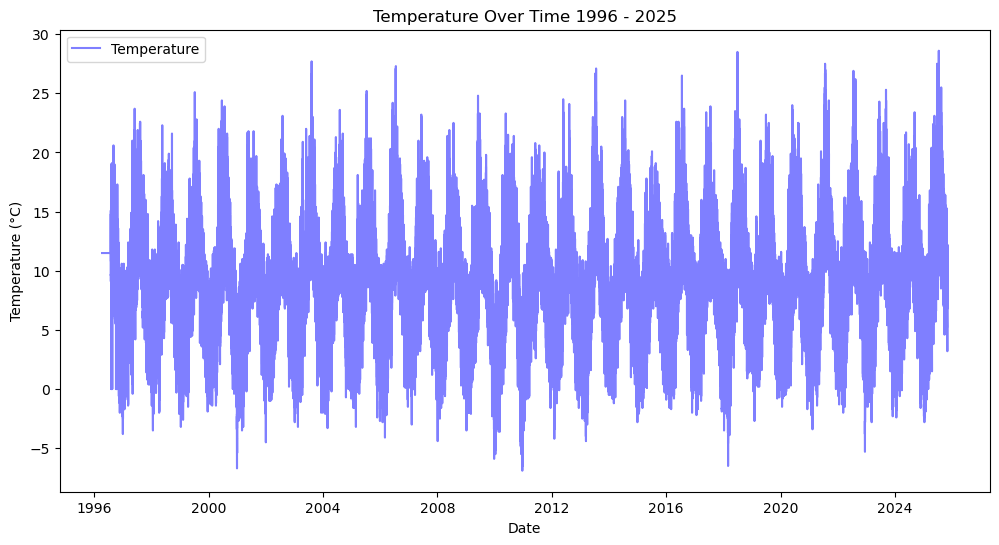

In [85]:
# temperature plot 1996-2025
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='temp', 
             color='blue', alpha=0.5, 
             label='Temperature')

plt.title('Temperature Over Time 1996 - 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

https://seaborn.pydata.org/generated/seaborn.lineplot.html

Text(0, 0.5, 'Temperature (°C)')

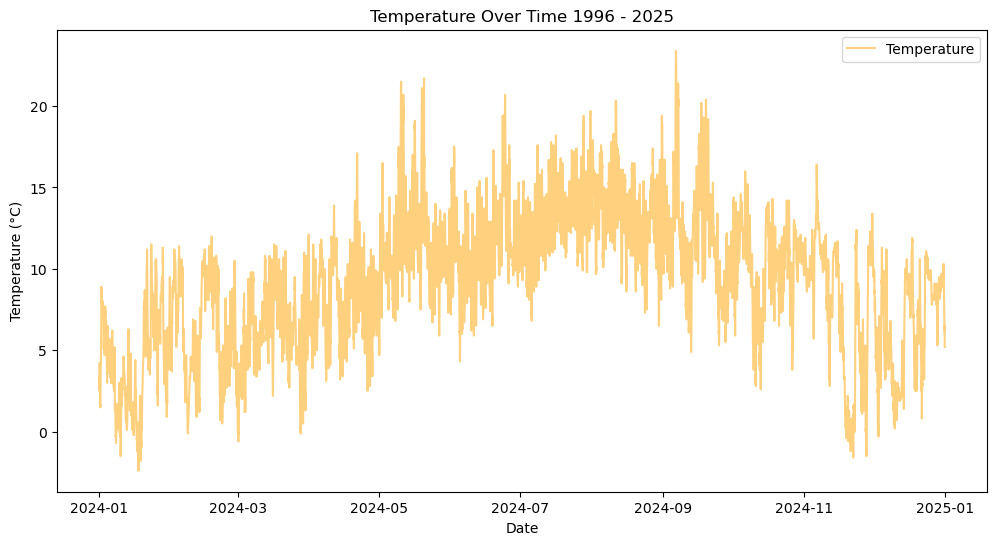

In [86]:
# temperature plot over one year 2024-2025
dateFrom = "01/01/2024 00:00"
dateTo = "01/01/2025 00:00"

plt.figure(figsize=(12, 6))
sns.lineplot(data=df.loc[dateFrom:dateTo], 
             x="date", y="temp", 
             color='orange', alpha=0.5, 
             label='Temperature')

plt.title('Temperature Over Time 1996 - 2025')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

## Task 2: Plot Daily Mean temp

In [87]:
# compute daily mean temp 1996-2025
daily_mean1 = df['temp'].resample('D').mean()

 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
 https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

Text(0, 0.5, 'Daily Mean Temperature')

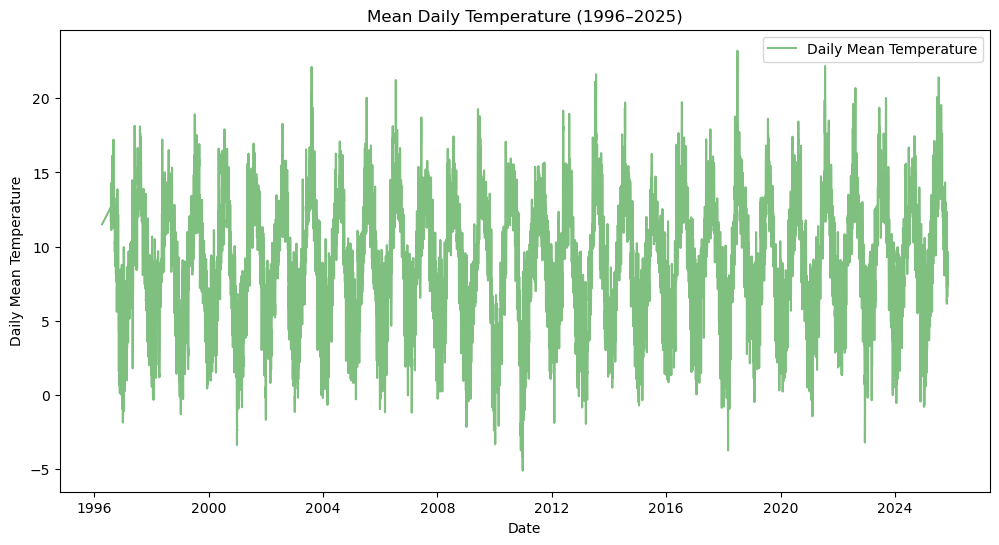

In [88]:
# Plot Daily Mean Temp 1996-2025
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_mean1.index, 
             y=daily_mean1.values,
             color='green', alpha=0.5, 
             label='Daily Mean Temperature')

plt.title("Mean Daily Temperature (1996–2025)")
plt.xlabel("Date")
plt.ylabel("Daily Mean Temperature")

In [89]:
# Filter between dates
df_filtered = df.loc[(df.index >= '01/01/2024 00:00')
                     & (df.index < '01/01/2025 00:00')]

https://www.geeksforgeeks.org/python/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

In [90]:
# Compute daily mean temp 2024-2025
daily_mean2 = df_filtered["temp"].resample("D").mean()

Text(0, 0.5, 'Daily Mean Temperature')

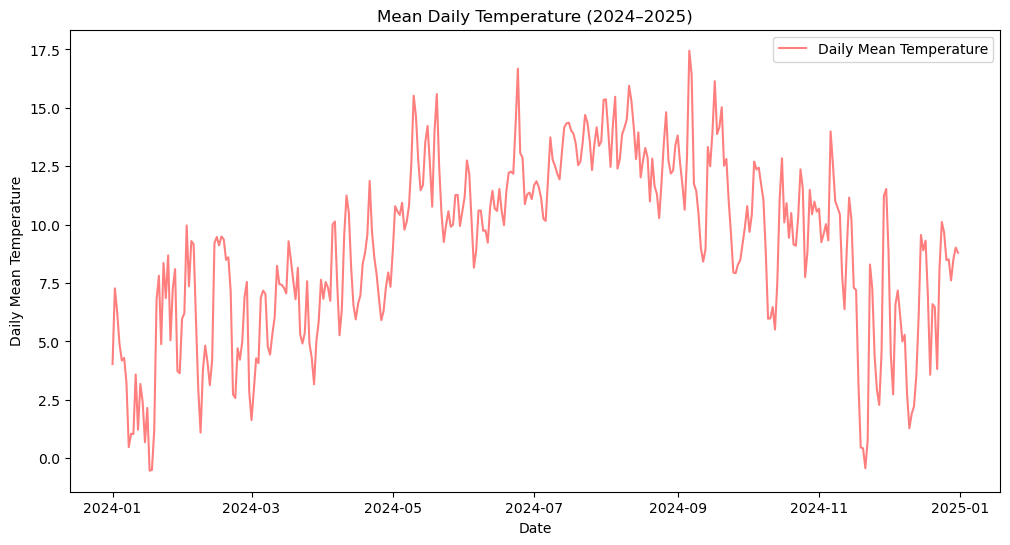

In [91]:
# Plot Daily Mean temp 2024-2025
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_mean2.index, 
             y=daily_mean2.values,
             color='red', alpha=0.5, 
             label='Daily Mean Temperature')

plt.title("Mean Daily Temperature (2024–2025)")
plt.xlabel("Date")
plt.ylabel("Daily Mean Temperature")

## Task 3: Plot Monthly Mean Temperature

In [92]:
# Calculate Monthly Mean Temp 1996 - 2025
monthly_mean_temp = df["temp"].resample("MS").mean()

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

Text(0, 0.5, 'Monthly Mean Temperature')

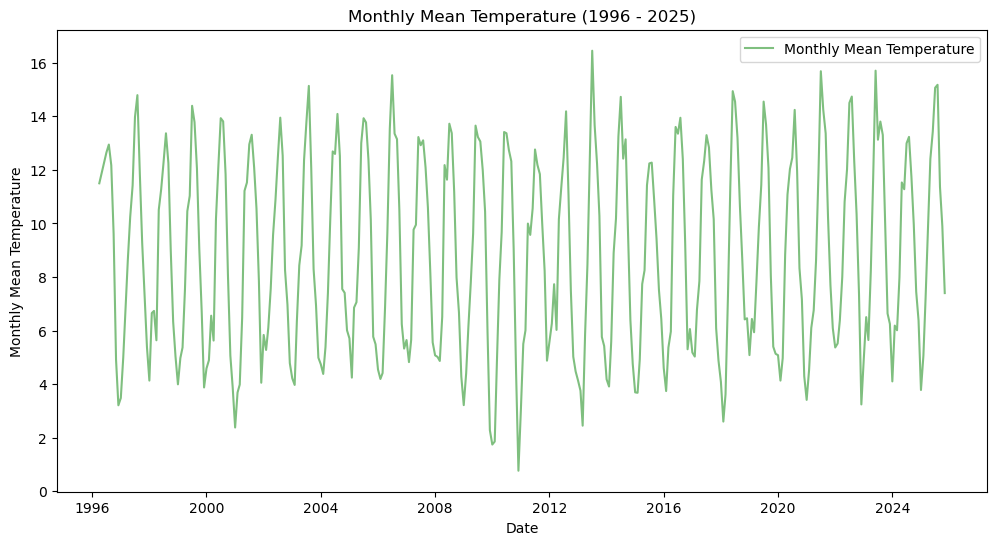

In [93]:
# Plot Monthly Mean Temp 1996 - 2025
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_temp.index, 
             y=monthly_mean_temp.values,
             color='g', alpha=0.5, 
             label='Monthly Mean Temperature') 

plt.title('Monthly Mean Temperature (1996 - 2025)')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Temperature')

In [94]:
# Calculate 2024 Monthly Mean Temp
monthly_2024 = df_filtered['temp'].resample('MS').mean()

Text(0, 0.5, 'Monthly Mean Temperature')

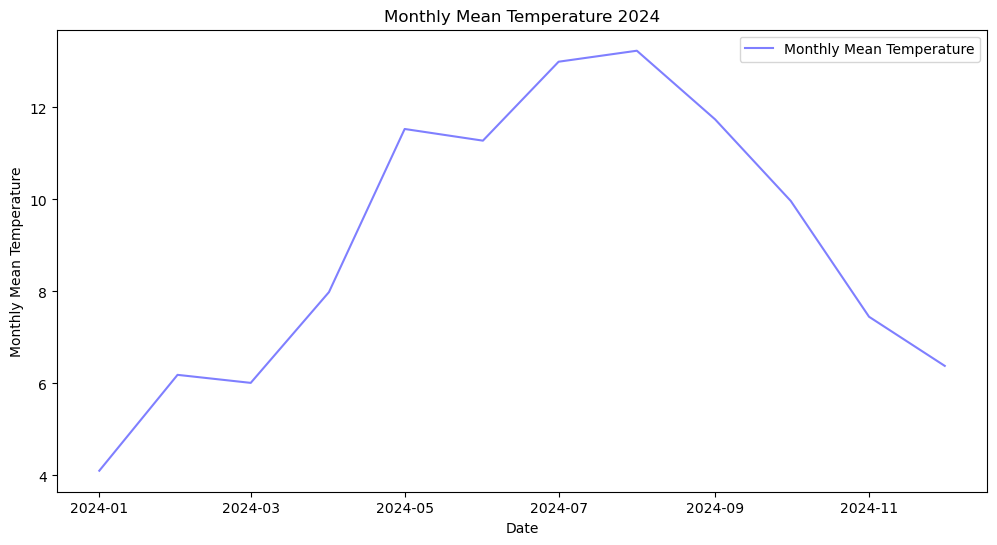

In [95]:
# Plot Monthly Mean Temp 2024
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_2024.index,
             y=monthly_2024.values,
             color='b', alpha=0.5, 
             label='Monthly Mean Temperature')
 
plt.title('Monthly Mean Temperature 2024')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Temperature')

## Task 4: Mean Wind Speed 1996 -2025 Plot  

In [96]:
# Check missing data 
print(df.isna().sum())

ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [97]:
# Dealing with missing windspeed data

df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

# Check for missing values
print(df.isna().sum())


ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       61598
w        61599
sun          0
vis      64759
clht        18
clamt       18
dtype: int64


In [98]:
# Remove rows where the specified column has NaN.
df = df.dropna(subset=["wdsp"])                 
# Remove rows where the column has empty strings
df = df[df["wdsp"].str.strip() != '']       

In [99]:
# convert to float 
df["wdsp"] = df["wdsp"].astype(float)
df["wdsp"]

date
1996-04-10 14:00:00     0.0
1996-07-31 08:00:00     0.0
1996-07-31 09:00:00     0.0
1996-07-31 10:00:00     0.0
1996-07-31 11:00:00     0.0
                       ... 
2025-10-31 20:00:00    13.0
2025-10-31 21:00:00    13.0
2025-10-31 22:00:00    10.0
2025-10-31 23:00:00     8.0
2025-11-01 00:00:00     7.0
Name: wdsp, Length: 256384, dtype: float64

In [100]:
# Calculate mean wind speed
windspeed = df["wdsp"].resample("YE").mean()

Text(0, 0.5, 'Mean Yearly Windspeed')

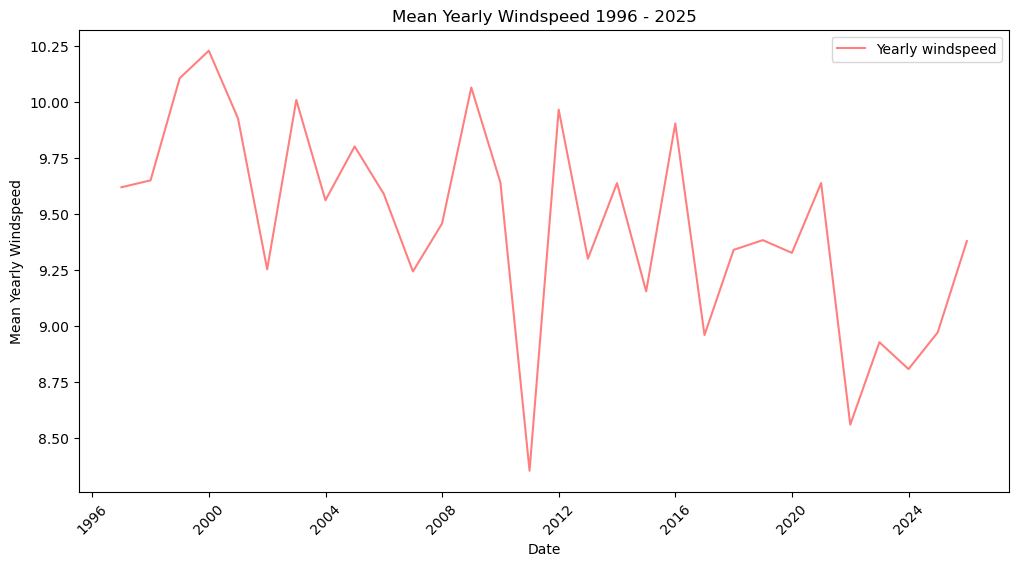

In [101]:
# Plot Mean Wind Speed 
plt.figure(figsize=(12, 6))
sns.lineplot(data=windspeed, color='r', 
             alpha=0.5, 
             label='Yearly windspeed')

plt.xticks(rotation=45) 
plt.title('Mean Yearly Windspeed 1996 - 2025')
plt.xlabel('Date')
plt.ylabel('Mean Yearly Windspeed')


## Task 5: Plot of Rolling Windspeed Over 24 hours 

In [103]:
# Filter data for 31st Oct 2025 & calculate rolling average 

dateFrom1 = "31/10/2025 00:00"
dateTo1 = "01/11/2025 00:00"
rolling_avg =  df.loc[dateFrom1:dateTo1].rolling(window=24).mean()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

## Task 6: Plot for Max Windspeed Per day 

## Task 7: Plot of Monthly Mean of the Daily Max Windspeeds